In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn

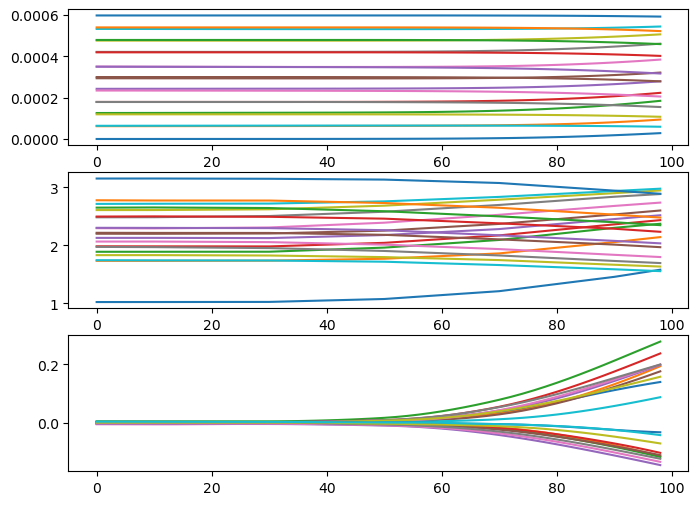

In [13]:
df = pd.read_csv("save_data_validate.csv", nrows=600, skiprows=150)


#drop even more timesteps
df = df.iloc[0:500:2]

L = df.columns.to_list()
time_cols = L[0::4]
sb_cols = L[1::4]
pb_cols = L[2::4]
wb_cols = L[3::4]
df[pb_cols] = df[pb_cols].to_numpy() / 1e5

fig, axs = plt.subplots(3, 1, figsize=(8, 6))
df[sb_cols].plot(ax=axs[0])
df[pb_cols].plot(ax=axs[1])
df[wb_cols].plot(ax=axs[2])
axs[0].get_legend().remove()
axs[1].get_legend().remove()
axs[2].get_legend().remove()

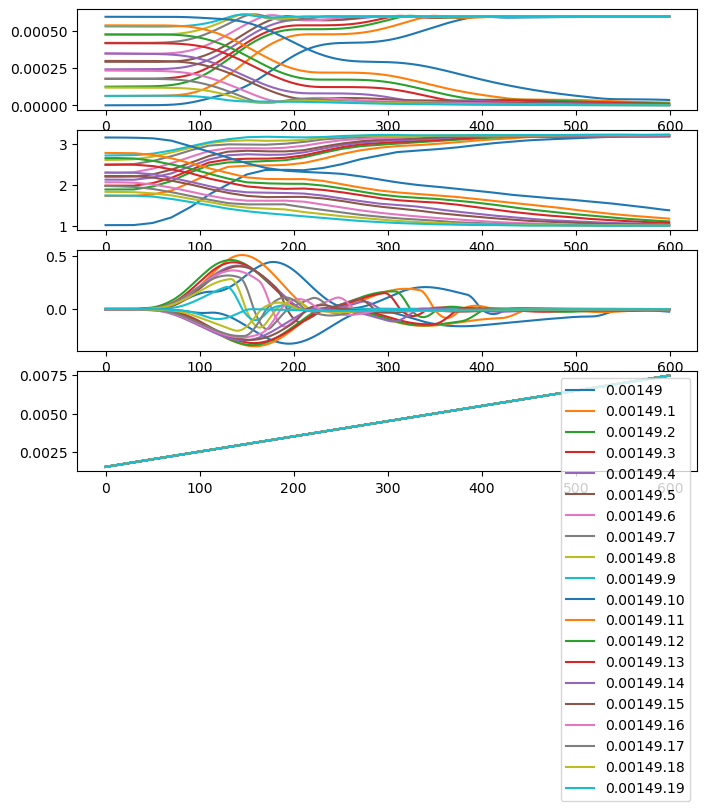

In [10]:
df = pd.read_csv("save_data_validate.csv", nrows=600, skiprows=150)
L = df.columns.to_list()
time_cols = L[0::4]
sb_cols = L[1::4]
pb_cols = L[2::4]
wb_cols = L[3::4]
df[pb_cols] = df[pb_cols].to_numpy() / 1e5

fig, axs = plt.subplots(4, 1, figsize=(8, 6))
df[sb_cols].plot(ax=axs[0])
df[pb_cols].plot(ax=axs[1])
df[wb_cols].plot(ax=axs[2])
df[time_cols].plot(ax=axs[3])
axs[0].get_legend().remove()
axs[1].get_legend().remove()
axs[2].get_legend().remove()


In [ ]:
df = pd.read_csv("save_data_test.csv", nrows=600, header=0, skiprows=[x for x in range(1,100)])


In [2]:

k=np.random.randint(0,500,1)[0]

fig, axs = plt.subplots(3, 1, figsize=(8, 6))
df[f"sb_{k}"].plot(ax=axs[0], label="sb", color="red")
df[f"pb_{k}"]=df[f"pb_{k}"]/1e5
df[f"pb_{k}"].plot(ax=axs[1], label="p_b", color="green")
df[f"wb_{k}"].plot(ax=axs[2], label="w_b")
for i in range(3):
    axs[i].legend()
    axs[i].grid()


NameError: name 'np' is not defined

In [4]:
import torch
import matplotlib.pyplot as plt

In [ ]:
tensor = torch.tensor(df.values)
tensor = tensor.view(600,500,4).permute(1,0,2)

In [ ]:
tensor.size()


In [6]:

def get_data(path = "ventil_lstm\save_data_test.csv"):
    
    df = pd.read_csv(path, header=0, nrows=600, skiprows=[x for x in range(1,100)])

    #drop even more timesteps
    df = df.iloc[::2]

    #Reorder columns for familiar setup (t,u,x) here (t, p_b, s_b, w_b)
    L = df.columns.to_list()
    time_cols = L[0::4]
    sb_cols = L[1::4]
    pb_cols = L[2::4]
    wb_cols = L[3::4]
    new_col_order = [x for sub in list(zip(time_cols, pb_cols, sb_cols, wb_cols)) for x in sub]
    df= df[new_col_order]
    df = df.drop(time_cols, axis=1)

    #normalise each column of the dataframe
    #mean normalization
    #df=(df-df.mean())/df.std()

    #min max normalization
    #normalize only a part of the data(??)
    df[sb_cols+wb_cols]=(df[sb_cols+wb_cols]-df[sb_cols+wb_cols].min())/(df[sb_cols+wb_cols].max()-df[sb_cols+wb_cols].min())
    
    #Can't normalize p_b because then a[i]*X+b[i] becomes cX+d for all i.. same with mean normal. 
    
    df[pb_cols] = df[pb_cols] / 1e5

    tensor = torch.tensor(df.values)

    #tensor with t=0:600, 500 different input and the 4 outputs [time, s_b, p_b, w_b]
    tensor = tensor.view(len(df),500,3).permute(1,0,2)


    return tensor


In [7]:
df = pd.read_csv("save_data_test.csv", header=0, nrows=600, skiprows=[x for x in range(1,100)])

#Reorder columns for familiar setup (t,u,x) here (t, p_b, s_b, w_b)
L = df.columns.to_list()
time_cols = L[0::4]
sb_cols = L[1::4]
pb_cols = L[2::4]
wb_cols = L[3::4]
new_col_order = [x for sub in list(zip(time_cols, pb_cols, sb_cols, wb_cols)) for x in sub]
df= df[new_col_order]
df = df.drop(time_cols, axis=1)

#normalise each column of the dataframe
#mean normalization
#df=(df-df.mean())/df.std()

#min max normalization
df[sb_cols+wb_cols]=(df[sb_cols+wb_cols]-df[sb_cols+wb_cols].min())/(df[sb_cols+wb_cols].max()-df[sb_cols+wb_cols].min())

df[pb_cols] = df[pb_cols] / 1e5


In [ ]:
print(tensor[0])
a= torch.tensor([[1,2],[3,4]])
a=tensor[0]
a[-1]

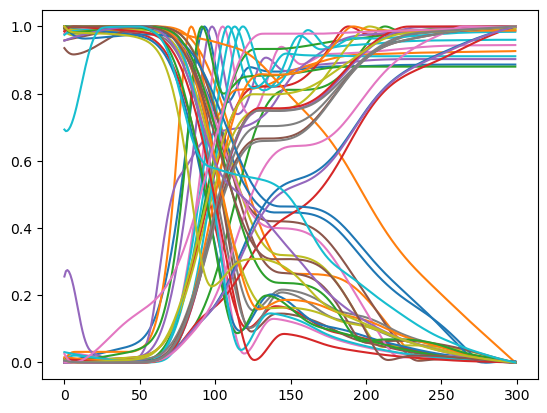

In [8]:
input_data = get_data(path="save_data_test.csv")

train_size = int(0.9 * len(input_data))
test_size = len(input_data) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(input_data, [train_size, test_size])

tensor=input_data[1:100, :, :]
for x in test_dataset:
    plt.plot(x[:500,1])
plt.show()

In [ ]:
# torch.version.cuda(): Returns CUDA version of the currently installed packages
# torch.cuda.is_available(): Returns True if CUDA is supported by your system, else False
# torch.cuda.current_device(): Returns ID of current device
# torch.cuda.get_device_name(device_ID): Returns name of the CUDA device with ID = ‘device_ID’
print( torch.cuda.is_available())
